## Carregando a biblioteca tidyverse

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
voos2008 <- read_csv("C:\\Users\\rfsam\\github\\postgraduate_data_science\\data\\voos2008.csv")

Rows: 100000 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): UniqueCarrier, TailNum, Origin, Dest, CancellationCode
dbl (24): Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
voosCancelados <- voos2008 %>%
    select(Cancelled, CancellationCode) %>%
    filter(Cancelled == 1) %>%
    group_by(CancellationCode) %>%
    mutate(totalAtraso=sum(Cancelled)) %>%
    select(CancellationCode, totalAtraso) %>%
    unique() %>%
    arrange(desc(totalAtraso))

In [4]:
codigoCancelamento <- c("A", "B", "C", "D")

In [5]:
descricaoCancelamento <- c("Operadora", "Clima", "NAS", "Segurança")

In [6]:
tiposOcorrencias <- data.frame(Codigo=codigoCancelamento, Descricao=descricaoCancelamento)

In [7]:
inner_join(x=voosCancelados, y=tiposOcorrencias, by=c("CancellationCode"="Codigo"))

CancellationCode,totalAtraso,Descricao
<chr>,<dbl>,<chr>
A,1116,Operadora
B,1080,Clima
C,535,NAS


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



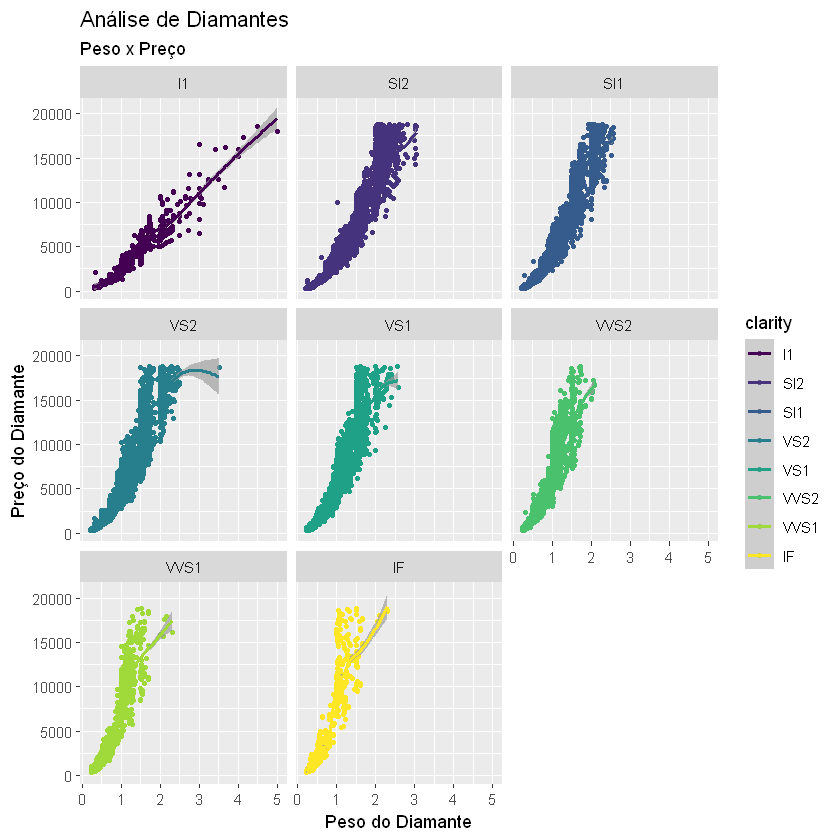

In [38]:
library(ggplot2)
library(RColorBrewer)

ggplot(diamonds, aes(x=carat, y=price)) +
    geom_point(aes(col=clarity), size=1) +
    geom_smooth() +
    ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
    xlab("Peso do Diamante") +
    ylab("Preço do Diamante") +
    geom_smooth(aes(x=carat, y=price, col=clarity)) +
    facet_wrap(~ clarity)

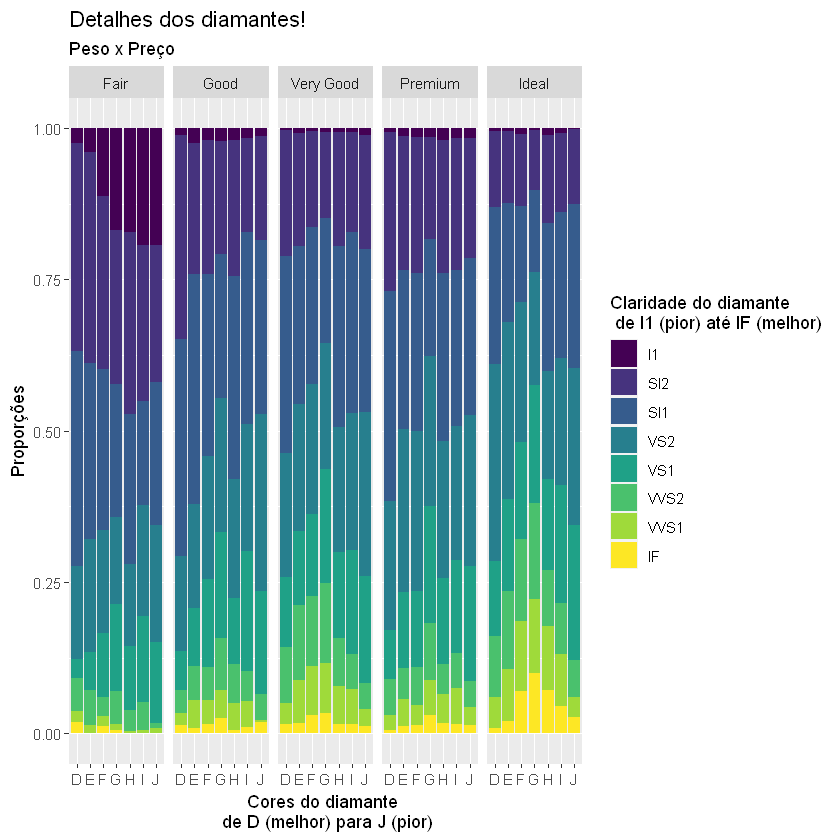

In [36]:
library(ggplot2)
library(RColorBrewer)

graficoDiamantes <- ggplot(diamonds, aes(x=color, fill=clarity)) +
    geom_bar(position="fill") +
    ggtitle("Análise de Diamantes", subtitle="Peso x Preço") +
    xlab("Cores do diamante \n de D (melhor) para J (pior)") +
    ylab("Proporções") +
    labs(fill="Claridade do diamante \n de I1 (pior) até IF (melhor)") +
    facet_grid(. ~ cut) +
    ggtitle("Detalhes dos diamantes!")

graficoDiamantes

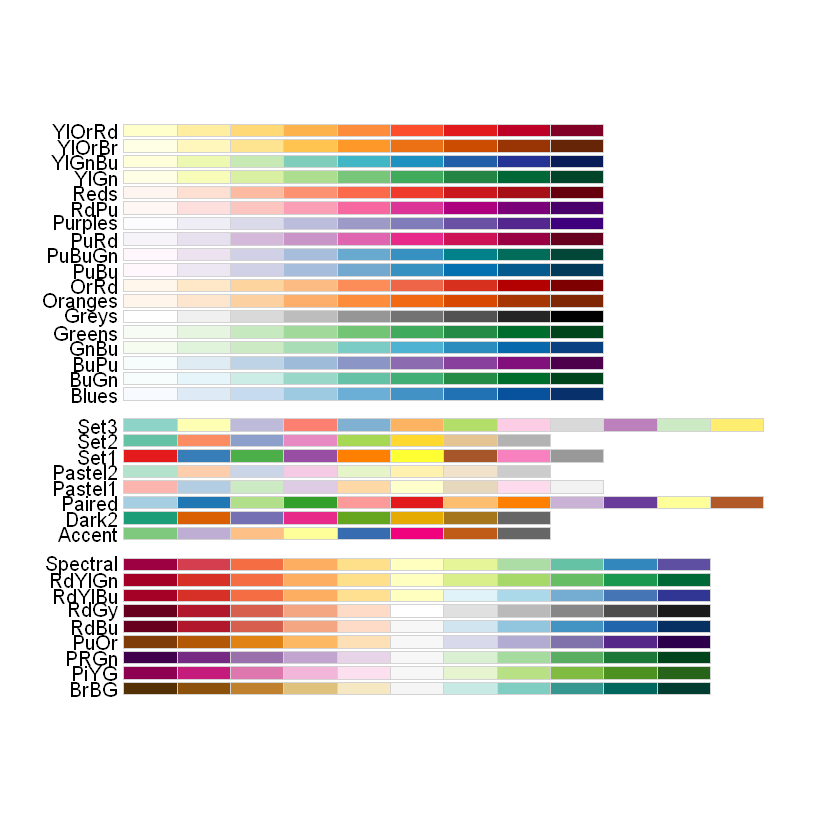

In [39]:
display.brewer.all()